In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

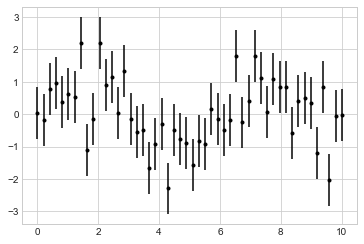

In [4]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='.k');

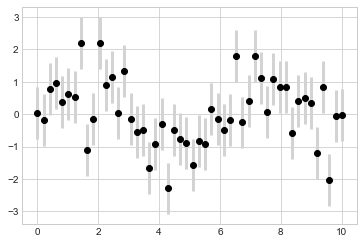

In [5]:
plt.errorbar(x,y,yerr=dy,fmt='o',color='black',
            ecolor='lightgray',elinewidth=3,capsize=0);

In [17]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [18]:
#定义模型和要画的数据
model = lambda x: x * np.sin(x)
xdata = np.array([1,3,5,6,8])
ydata = model(xdata)

#计算高斯过程拟合结果
gp = GaussianProcessRegressor(random_state=100)
gp.fit(xdata[:,np.newaxis],ydata)

xfit = np.linspace(0,10,1000)
yfit,MSE = gp.predict(xfit[:,np.newaxis],return_std=True)
dyfit = 2 * np.sqrt(MSE)  #2 *sigma-95%置信区间

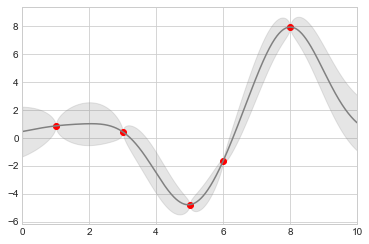

In [20]:
#将结果可视化
plt.plot(xdata,ydata,'or')
plt.plot(xfit,yfit,'-',color='gray')

plt.fill_between(xfit,yfit - dyfit,yfit + dyfit,color='gray',alpha=0.2)
plt.xlim(0,10);